In [727]:
#import libraries
import pandas as pd
import numpy as np

In [729]:
#load the dataset
data=pd.read_csv("C:\\Users\\dheni\\Downloads\\DS Assignments\\13.Decision Tree\\heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [731]:
#summary
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [733]:
#explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [735]:
#missing values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [741]:
#handling missing values
data.fillna("0.0",inplace=True)

In [739]:
#missing values after
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [737]:
# Check unique values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}:\n", data[col].unique())

Unique values in sex:
 ['Male' 'Female']
Unique values in cp:
 ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values in restecg:
 ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values in exang:
 ['FALSE' 'TRUE' 'TURE']
Unique values in slope:
 ['downsloping' 'flat' 'upsloping']
Unique values in thal:
 ['fixed defect' 'normal' 'reversable defect']


In [743]:
#import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

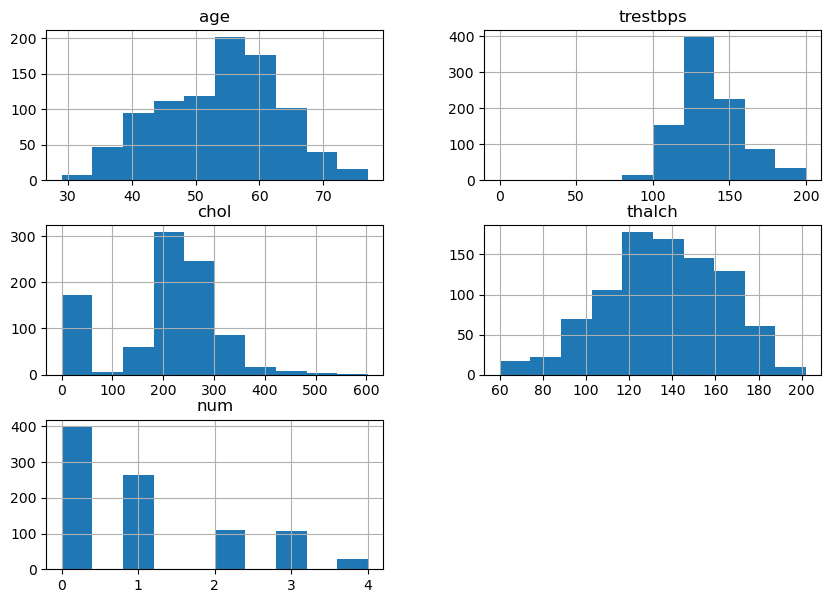

In [745]:
# Histograms
data.hist(figsize=(10, 7))
plt.show()

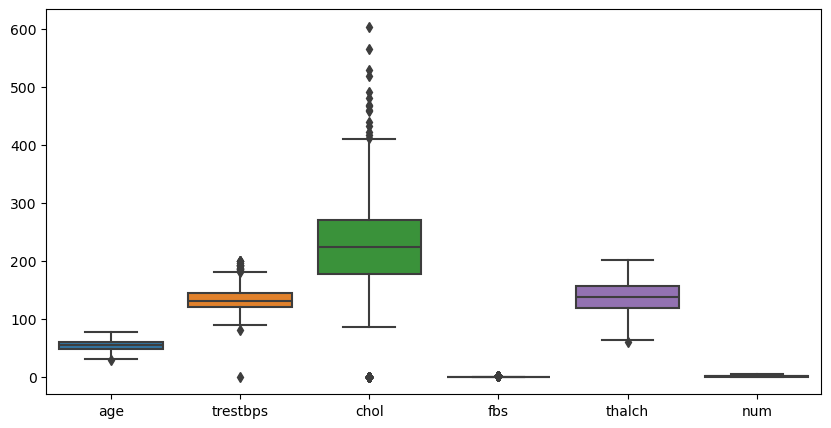

In [749]:
# Box plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.show()

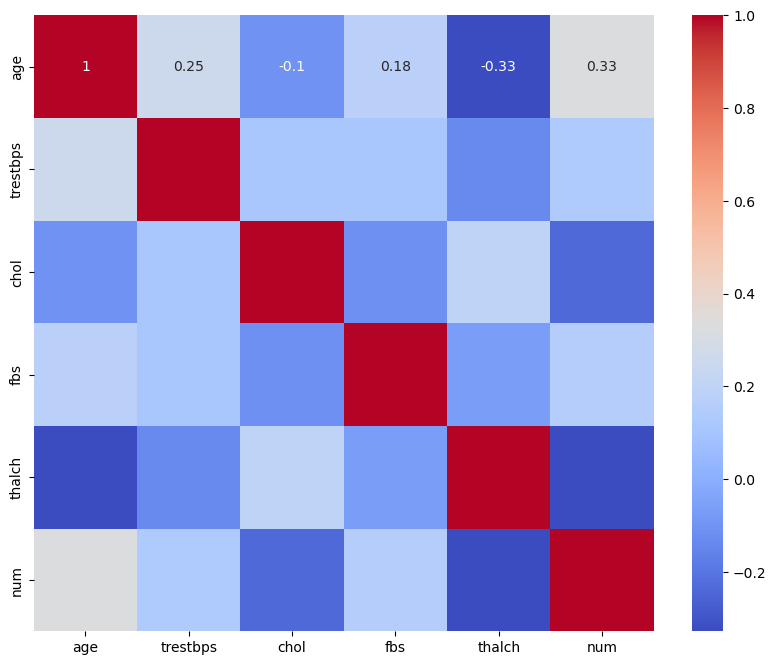

In [747]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [751]:
#featuring data
featured_data = pd.get_dummies(data,columns=['sex',	'cp', 'fbs', 'restecg',	'exang', 'slope', 'thal'], drop_first=True)
featured_data

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,0,0,1,1,0,0,0,0,0,0,0,0
1,41,135,203,132,0.0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
2,57,140,192,148,0.4,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,52,118,186,190,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,57,110,201,126,1.5,0,1,0,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,4,1,0,0,0,0,1,0,0,0,0,1,0,1
904,62,166,170,120,3.0,4,1,0,0,0,0,0,1,1,0,1,0,0,1
905,56,170,0,123,2.5,4,1,0,1,0,0,0,0,1,0,0,0,0,0
906,56,144,208,105,0.0,4,1,0,1,0,1,0,1,0,1,0,0,0,1


In [753]:
#import library
from sklearn.preprocessing import StandardScaler

In [755]:
#Scaling 
scaler = StandardScaler()
scaled_data=(featured_data[featured_data.columns]) = (scaler.fit_transform(featured_data[featured_data.columns]))
scaled_data

array([[ 1.00602683,  0.56739446,  0.28129674, ..., -0.69894534,
        -0.79936798, -0.78280817],
       [-1.39756029,  0.07696688,  0.01352615, ..., -0.69894534,
        -0.79936798, -0.78280817],
       [ 0.35050307,  0.32218067, -0.0846564 , ..., -0.69894534,
        -0.79936798, -0.78280817],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, ..., -0.69894534,
        -0.79936798, -0.78280817],
       [ 0.24124911,  0.5183517 ,  0.05815458, ..., -0.69894534,
        -0.79936798,  1.27745217],
       [ 0.35050307,  0.42026619,  0.67402693, ..., -0.69894534,
        -0.79936798, -0.78280817]])

In [757]:
#import library
from sklearn.model_selection import train_test_split

In [759]:
#split the dataset
X = featured_data.drop('thal_reversable defect',axis=1)
Y = featured_data['thal_reversable defect']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1, random_state=40)

In [761]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [763]:
#binning a continuous target variable into two categories
y_binned = pd.cut(y, bins=[-np.inf, 0.5, np.inf], labels=[0, 1])

In [765]:
#adjust y_binned to match the number of samples in x_train
y_binned = y_binned[:len(x_train)] 

In [767]:
#train the model
model=DecisionTreeClassifier()
model.fit(x_train, y_binned)

DecisionTreeClassifier()

In [787]:
# Assuming y_test is continuous
bins = [0, 1, 2]
labels = [0, 1] 
y_binned2 = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels, include_lowest=True)

In [771]:
#missing values
y_binned2.isnull().sum()

1

In [813]:
valid_indices = ~y_binned2.isnull()  # Get indices of non-NaN values
y_binned2 = y_binned2[valid_indices]
y_pred = y_pred_binned[valid_indices] 

In [801]:
# Fill NaNs with the mode
y_binned2.fillna(y_binned2.mode(), inplace=True) 

In [861]:
print('Precision:', precision_score(y_binned2, y_pred))
print('Recall:', recall_score(y_binned2, y_pred))

Precision: 0.0
Recall: 0.0


In [631]:
#import library
from sklearn.model_selection import GridSearchCV

In [683]:
# Define hyperparameters
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'criterion': ['gini', 'entropy']}

In [592]:
# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5,error_score='raise')
grid_search.fit(x_train, y_binned)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]})

In [594]:
# Best parameters
print('Best parameters:', grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [627]:
#import library
from sklearn.tree import plot_tree

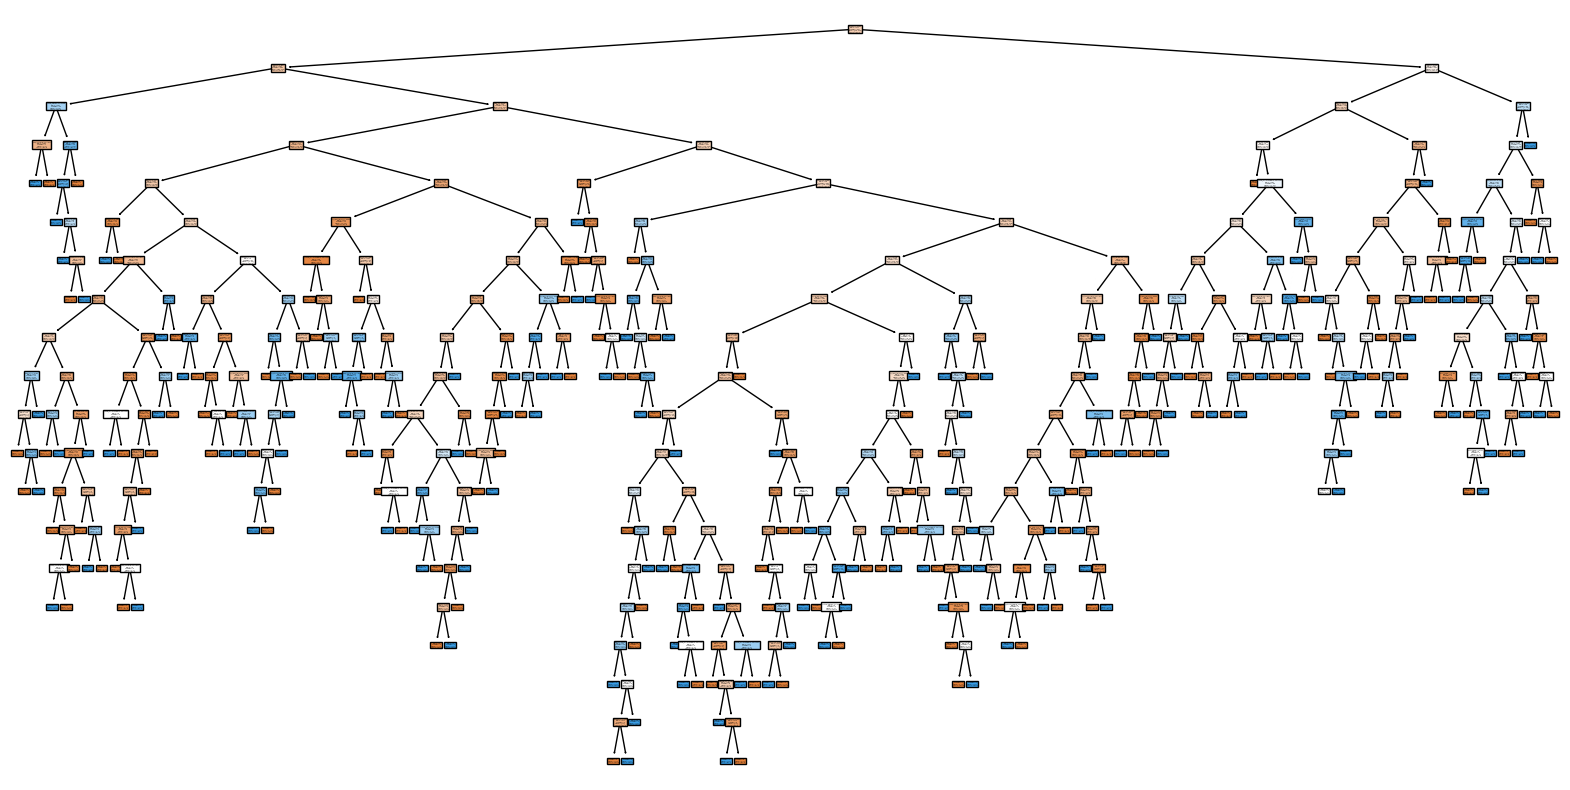

In [620]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Max Depth: Controls the maximum depth of the tree. Deeper trees can model more complex patterns but may overfit.

Min Samples Split: The minimum number of samples required to split an internal node. Higher values prevent overfitting.

Criterion: The function to measure the quality of a split (e.g., ‘gini’ for Gini impurity, ‘entropy’ for information gain).

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding: Converts categorical values into numerical values (e.g., ‘red’ -> 1, ‘blue’ -> 2). Suitable for ordinal d
ata.

One-Hot Encoding: Converts categorical values into binary vectors (e.g., ‘red’ -> [1, 0], ‘blue’ -> [0, 1]). Suitable for nominal data without any order.